In [1]:
%load_ext notexbook

In [2]:
%texify

<span class="badges">[![colab-badge](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/leriomaggio/deep-learning-health-life-sciences/blob/master/1_Warm_up/2_torch_playground.ipynb)
[![](https://img.shields.io/badge/Open%20in-Binder-E66581.svg?logo=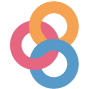)](https://mybinder.org/v2/gh/leriomaggio/deep-learning-health-life-sciences/master/?filepath=1_Warm_up/2_torch_playground.ipynb)
[![](https://img.shields.io/badge/%20%20Read%20on-NBViewer-F5A252.svg?logo=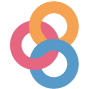)](https://nbviewer.jupyter.org/github/leriomaggio/deep-learning-health-life-sciences/blob/master/1_Warm_up/2_torch_playground.ipynb?flush_cache=true)
</span>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-PyTorch" data-toc-modified-id="What-is-PyTorch-1">What is PyTorch</a></span></li><li><span><a href="#Tensors" data-toc-modified-id="Tensors-2">Tensors</a></span><ul class="toc-item"><li><span><a href="#Creating-Tensors" data-toc-modified-id="Creating-Tensors-2.1">Creating Tensors</a></span><ul class="toc-item"><li><span><a href="#Using-Python-list-or-NumPy-ndarray" data-toc-modified-id="Using-Python-list-or-NumPy-ndarray-2.1.1">Using Python <code>list</code> or NumPy <code>ndarray</code></a></span></li><li><span><a href="#Specialised-torch-functions" data-toc-modified-id="Specialised-torch-functions-2.1.2">Specialised <code>torch</code> functions</a></span><ul class="toc-item"><li><span><a href="#torch.arange-and-alike" data-toc-modified-id="torch.arange-and-alike-2.1.2.1"><code>torch.arange</code> and <em>alike</em></a></span></li><li><span><a href="#torch.zeros,-torch.ones" data-toc-modified-id="torch.zeros,-torch.ones-2.1.2.2"><code>torch.zeros</code>, <code>torch.ones</code></a></span></li><li><span><a href="#torch.empty-and-torch.full" data-toc-modified-id="torch.empty-and-torch.full-2.1.2.3"><code>torch.empty</code> and <code>torch.full</code></a></span></li><li><span><a href="#torch.rand" data-toc-modified-id="torch.rand-2.1.2.4"><code>torch.rand</code></a></span></li><li><span><a href="#_like" data-toc-modified-id="_like-2.1.2.5"><code>_like</code></a></span></li></ul></li></ul></li><li><span><a href="#2.-Tensor-Types" data-toc-modified-id="2.-Tensor-Types-2.2">2. Tensor Types</a></span></li><li><span><a href="#3.-Tensor-Operations" data-toc-modified-id="3.-Tensor-Operations-2.3">3. Tensor Operations</a></span></li><li><span><a href="#Special-Tensor-initializations" data-toc-modified-id="Special-Tensor-initializations-2.4">Special Tensor initializations</a></span><ul class="toc-item"><li><span><a href="#Operations" data-toc-modified-id="Operations-2.4.1">Operations</a></span><ul class="toc-item"><li><span><a href="#Swapping-Axes" data-toc-modified-id="Swapping-Axes-2.4.1.1">Swapping Axes</a></span></li></ul></li></ul></li><li><span><a href="#Computing-Gradients" data-toc-modified-id="Computing-Gradients-2.5">Computing Gradients</a></span></li><li><span><a href="#CUDA-Tensors" data-toc-modified-id="CUDA-Tensors-2.6">CUDA Tensors</a></span><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-2.6.1">Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-2.6.2">Exercise 2</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-2.6.3">Exercise 3</a></span></li><li><span><a href="#Exercise-6" data-toc-modified-id="Exercise-6-2.6.4">Exercise 6</a></span></li></ul></li></ul></li></ul></div>

# PyTorch Playground

## What is PyTorch

-  A library for **Tensor** manipulation (**this** notebook);
-  a deep learning framework that provides maximum flexibility and speed ([`torch_nn_playground`](2_torch_nn_playground.ipynb) notebook).

One of the **striking feature** of PyTorch is its *natural* integration with **NumPy**, which aided substantially its adoption among researchers, who are not necessarily inclined to work with 
hard-to-learn APIs (sorry `TensorFlow 1.x`).

Indeed, learning `PyTorch APIs` is by far easier than learning the API of other frameworks 
(e.g. `TensorFlow`)[$^1$](#fn1)

`NumPy` integration + **Dynamic Graph** computation makes `torch` a great tool for researcher and practitioners.


<span id="fn1">Actually there are people who spent so much time and effort to learn `TF 1.x` API so that they are very reluctuant to even updated to `TF 2.x`</span>

In [3]:
import torch
import numpy as np

## Tensors

**Tensors** are the **main** data structure supported by PyTorch (*everything is built around `torch.Tensor`*)

* Scalar is a single number.
* Vector is an array of numbers.
* Matrix is a 2-D array of numbers.
* Tensors are N-D arrays of numbers.

$\rightarrow$ **NumPy Arrays**: For a quick overview on how to create and manage `numpy` arrays, you can have a look at 
[this notebook](https://nbviewer.jupyter.org/github/leriomaggio/numpy-euroscipy/blob/master/01_numpy_basics.ipynb?flush_cache=true) extracted from `NumPy Tutorial @ EuroSciPy 2015`

### Creating Tensors

You can create tensors by specifying the shape as arguments.  

Here is a tensor with `6` rows and `4` columns

In [4]:
t = torch.Tensor(6, 4)

In [5]:
t.shape  # shape of tensor

torch.Size([6, 4])

In [6]:
t.type()  # dtype of tensor

'torch.FloatTensor'

In [7]:
t[2:4, :]  #slicing

tensor([[3.4718e-28, 4.5811e-41, 3.4718e-28, 4.5811e-41],
        [3.4718e-28, 4.5811e-41, 0.0000e+00, 0.0000e+00]])

Tensors can be initialized and then **filled in place**. 

**Note**: Operations that **end in an underscore** (`_`) are in place operations by convention.
On a more general note, this _software design strategy_ is usually referred to as _Convention over Configuration_ principle.



In [8]:
x = torch.Tensor(3,4).fill_(5)
print(x.type())
print(x.shape)
print(x)

torch.FloatTensor
torch.Size([3, 4])
tensor([[5., 5., 5., 5.],
        [5., 5., 5., 5.],
        [5., 5., 5., 5.]])


#### Using Python `list` or NumPy `ndarray`

Tensors can be initialized from a list of lists (for 2D tensor)

In [9]:
# from Python list
x = torch.Tensor([[1, 2,],  
                  [3, 4,],
                  [5, 6,]
                 ])
print(x.type())
x

torch.FloatTensor


tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

... or a `numpy.array` using the `torch.from_numpy` function

In [10]:
npy = np.random.rand(4, 4)
torch.from_numpy(npy)

tensor([[0.5084, 0.6775, 0.4990, 0.3134],
        [0.6660, 0.7842, 0.8693, 0.0089],
        [0.9546, 0.1973, 0.9829, 0.7512],
        [0.5414, 0.4437, 0.2599, 0.4056]], dtype=torch.float64)

#### Specialised `torch` functions

There also exist specialised `torch` function returning `torch.Tensor` instances. 

We will examples for some of them below:

- [`torch.arange` and _alike_](#torch.arange)
- [`torch.zeros` and `torch.ones`](#zeros_and_ones)
- [`torch.empty` and `torch.full`](#empty_and_full)
- [`torch.rand`](#torch.rand)
- [`_like`](#like)

##### `torch.arange` and _alike_

We can use the `torch.arange` function ($\Rightarrow$ [doc](https://pytorch.org/docs/stable/generated/torch.arange.html)) to generate a tensor of numbers in the **range**:
$$
[ \frac{end - start}{step} ]
$$

This function is _almost_ identical to `np.arange` $\Rightarrow$ [doc](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

Similarly to `numpy.arange`:
- `start` is `0` by default
- `step` is `1` by default
- `step` can be also a `float`, so `roundoff` error applies when calculating items in range.

In [38]:
t_arange = torch.arange(6)
t_arange

tensor([0, 1, 2, 3, 4, 5])

Now specifying `start`, `stop`, and `step`

In [39]:
t_arange = torch.arange(0, 55, 5)  # times table of 5
t_arange

tensor([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

And with a **non-integer** step

In [40]:
t_arange = torch.arange(0, 5.5, .5)  # times table of 5 scaled by 10
t_arange

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])

**Note**: 
There _still_ exists the `torch.range` function, which is **deprecated** and not to be used. This function will be removed in future versions of PyTorch.

###### `linspace` and `logspace`

To generate a tensor of numbers **evenly** spaced in a range we can use the [`torch.linspace`](https://pytorch.org/docs/stable/generated/torch.linspace.html) function (or [`torch.logspace`](https://pytorch.org/docs/stable/generated/torch.logspace.html) for logarithmic scale for a specified `base`):

In [47]:
t_linspace = torch.linspace(start=1, end=40, steps=4)

In [48]:
t_linspace

tensor([ 1., 14., 27., 40.])

In [49]:
t_logspace = torch.logspace(start=2, end=6, base=2, steps=4)

In [50]:
t_logspace

tensor([ 4.0000, 10.0794, 25.3984, 64.0000])

<a name="zeros_and_ones"></a>

##### `torch.zeros`, `torch.ones`

We can also initialize tensors of `zeros` or `ones`:

In [14]:
zeros = torch.zeros(4, 4)
ones = torch.ones(4, 4)

These functions both return a tensor filled with the scalar value `0` or `1` respectively,  with the `shape` defined by the variable argument size.

These two functions are identical to homonymous versions in `numpy`: [`numpy.zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html); [`numpy.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html)

In [15]:
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [16]:
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

<a name="empty_and_full"></a>

##### `torch.empty` and `torch.full`

Similarly, `torch.emtpy` and `torch.full` will respectively create an empty tensor, or a tensor filled with a specific *scalar* value.

Again, these two utility functions share a similar API of their NumPy counterparts: [`numpy.empty`](https://numpy.org/doc/stable/reference/generated/numpy.empty.html), and [`numpy.full`](https://numpy.org/doc/stable/reference/generated/numpy.full.html)

In [30]:
empty_t = torch.empty(4, 2)

In [32]:
empty_t.shape, empty_t.dtype

(torch.Size([4, 2]), torch.float32)

In [36]:
full_t = torch.full(size=(6, 1), fill_value=4)

In [37]:
full_t

tensor([[4],
        [4],
        [4],
        [4],
        [4],
        [4]])

##### `torch.rand`

It's common in experimenting to create tensors with **random numbers** of a specific `shape`.

**Note**: Since, from now on in this notebook we are going to deal with _random_, let's set some `seeds` first. 
It is not particularly _crucial_ here, but it is a good idea to replicate same outputs, and good practice in general.

In [17]:
np.random.seed(123456)
torch.random.manual_seed(123456)

In [18]:
x = torch.rand(2, 3)
x.shape

torch.Size([2, 3])

`torch.rand` returns a tensor filled with random numbers from a **uniform distribution** on the interval [0, 1)[0,1)

In [19]:
x

tensor([[0.5043, 0.8178, 0.4798],
        [0.9201, 0.6819, 0.6900]])

##### `_like`

Finally, PyTorch includes a series of _utility_ functions to quickly create tensors similar to other tensors. These functions are identical to previous one, and have the `_like` suffix in their names.(i.e. `like`). The new tensor will share the same `shape` as well as the `dtype`

In [20]:
zeros_like = torch.zeros_like(x)

In [22]:
zeros_like.shape, x.shape

(torch.Size([2, 3]), torch.Size([2, 3]))

In [23]:
zeros_like.dtype, x.dtype

(torch.float32, torch.float32)

If needed, we can force the `dtype` paramenter for the new tensor:

In [24]:
# dtype will be int, this time
ones_like = torch.ones_like(x, dtype=int)

In [25]:
ones_like.dtype, x.dtype

(torch.int64, torch.float32)

torch.float32

### 2. Tensor Types

The `FloatTensor` is the **default** tensor type.

However, we can control the type of **tensors** by explicit casting (via `dtype`), or specialised constructors.

In [15]:
x = torch.FloatTensor([[1, 2, 3],  
                       [4, 5, 6]])
# converts to long
x = x.long()
x.type()

'torch.LongTensor'

In [16]:
# Specify `dtype` in the constructor
x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype=torch.int64)
x.type()

'torch.LongTensor'

⚠️ **Note**

Please note that so far we have been using `torch.Tensor`, whereas in the cell above we used `torch.tensor` instead. There is a (_quite substantial, ed._) difference between the two.

1. `torch.Tensor` is a `class`, i.e. the main **tensor** class in the PyTorch Data Model;
2. `torch.tensor` is a [`function`](https://pytorch.org/docs/stable/torch.html#torch.tensor), used to create a tensor from `data`, of a specified `dtype`

**See also** [stack overflow `#51911749`](https://stackoverflow.com/questions/51911749/what-is-the-difference-between-torch-tensor-and-torch-tensor)

In [17]:
x.float().type()

'torch.FloatTensor'

In [18]:
x.type()

'torch.LongTensor'

**What happened??** 

Method like `.float()` or `.long()` return a **new copy** of a `Tensor` object.

###### Excercise

Try to create a long tensor from a `random` NumPy array and then cast it as `float`

In [ ]:
# Your code here



### 3. Tensor Operations

In [29]:
x = torch.arange(10).view(5, 2)  # view is the equivalent for np.reshape

In [30]:
x

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [31]:
x + x

tensor([[ 0,  2],
        [ 4,  6],
        [ 8, 10],
        [12, 14],
        [16, 18]])

In [35]:
x * 2

tensor([[ 0,  2],
        [ 4,  6],
        [ 8, 10],
        [12, 14],
        [16, 18]])

The convention of `_` indicating in-place operations continues:

In [36]:
x = torch.arange(12).reshape(3, 4)
print(x)
print(x.add_(x))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [16, 18, 20, 22]])


In [27]:
torch.sum(x, dim=0)  # over axis = 0

tensor([3, 5, 7])

In [28]:
torch.sum(x, dim=1)  # over axis = 1 (column-wise)

tensor([ 3, 12])

In [29]:
# np.swapaxes

torch.transpose(x, 0, 1)

tensor([[0, 3],
        [1, 4],
        [2, 5]])

Long Tensors are used for indexing operations and mirror the `int64` numpy type

In [24]:
x = torch.LongTensor([[1, 2, 3],  
                      [4, 5, 6],
                      [7, 8, 9]])
describe(x)
print(x.dtype)
print(x.numpy().dtype)

Type: torch.LongTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.int64
int64


You can convert a FloatTensor to a LongTensor

In [25]:
x = torch.FloatTensor([[1, 2, 3],  
                       [4, 5, 6],
                       [7, 8, 9]])
x = x.long()
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


### Special Tensor initializations

We can create a vector of incremental numbers

In [26]:
x = torch.arange(0, 10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


Sometimes it's useful to have an integer-based arange for indexing

In [27]:
x = torch.arange(0, 10).long()
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


#### Operations

Using the tensors to do linear algebra is a foundation of modern Deep Learning practices

**Reshaping** allows you to move the numbers in a tensor around.  

In PyTorch, reshaping is called `view`:

(*from the documentation: *)
> Returns a new tensor with the same data as the self tensor but of a different shape.
>  The returned tensor **shares the same** data and must have the same number of elements, but may have a different size. For a tensor to be viewed, the new view size must be compatible with its original size and stride

We can use view to add size-1 dimensions, which can be useful for combining with other tensors.  

**This is called broadcasting.**

In [31]:
x = torch.arange(0, 20)

print(x.view(1, 20))
print(x.view(2, 10))
print(x.view(4, 5))
print(x.view(5, 4))
print(x.view(10, 2))
print(x.view(20, 1))

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19]])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]])
tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19]])


In [32]:
x = torch.arange(12).view(3, 4)
y = torch.arange(4).view(1, 4)
z = torch.arange(3).view(3, 1)

print(x)
print(y)
print(z)
print(x + y)
print(x + z)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[0, 1, 2, 3]])
tensor([[0],
        [1],
        [2]])
tensor([[ 0,  2,  4,  6],
        [ 4,  6,  8, 10],
        [ 8, 10, 12, 14]])
tensor([[ 0,  1,  2,  3],
        [ 5,  6,  7,  8],
        [10, 11, 12, 13]])


Unsqueeze and squeeze will add and remove 1-dimensions.

In [33]:
x = torch.arange(12).view(3, 4)
print(x.shape)

x = x.unsqueeze(dim=1)
print(x.shape)

x = x.squeeze()
print(x.shape)

torch.Size([3, 4])
torch.Size([3, 1, 4])
torch.Size([3, 4])


##### Swapping Axes

Another very common operation to perform requires `swapping` axes when analysing images, due to different internal representation between `numpy` and `torch`.

For instance, for a 3D tensor representing a simple `RGB` (three channels) image:

`torch` $\mapsto$ (`channel`, `row`, `col`);
`numpy` $\mapsto$ (`row`, `col`, `channel`).

Transposing allows you to switch the dimensions to be on different axis. So we can make it so all the rows are columsn and vice versa. 

In [38]:
x = torch.arange(2352).view(28, 28, 3)
print("x: \n", x.shape) 
print("tranpose: \n", x.transpose(2, 0).shape)
print("x - again: \n", x.shape)

x: 
 torch.Size([28, 28, 3])
tranpose: 
 torch.Size([3, 28, 28])
x - again: 
 torch.Size([28, 28, 3])


###### Understanding Dimensions in `Tensor`

A `3D` tensor would represent a `batch` of sequences, where each sequence item has a feature vector.  

It is common to switch the batch and sequence dimensions so that we can more easily index the sequence in a sequence model.

Note: `transpose` will only let you swap `2` axes.  `permute` allows for multiple axes:

In [39]:
batch_size = 3
seq_size = 28
feature_size = 28

x = torch.arange(batch_size * seq_size * feature_size).view(batch_size, seq_size, feature_size)

Permute is a more general version of tranpose:

In [40]:
print("x.permute(1, 0, 2).shape: \n", x.permute(1, 0, 2).shape)

x.permute(1, 0, 2).shape: 
 torch.Size([28, 3, 28])


In [41]:
x = torch.arange(0, 12).view(3,4).float()
print(x)

x2 = torch.ones(4, 2)
x2[:, 1] += 1
print(x2)

print(x.mm(x2))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[1., 2.],
        [1., 2.],
        [1., 2.],
        [1., 2.]])
tensor([[ 6., 12.],
        [22., 44.],
        [38., 76.]])


See the [PyTorch Math Operations Documentation](https://pytorch.org/docs/stable/torch.html#math-operations) for more!

### Computing Gradients

Central to Tensors is the *free* computation of **gradients** - **when required**!

To specify that a `Tensor` requires `gradient`, the option `requires_grad` has to be provided.

In [42]:
x = torch.tensor([[2.0, 3.0]], requires_grad=True)
z = 3 * x
print(z)

tensor([[6., 9.]], grad_fn=<MulBackward0>)


In the **next** example, we are going to slightly complicate a bit more the (**graph**) of operations..

1. We create a tensor and multiply it by `3`.  
2. We create a scalar output using `sum()`.  

A Scalar output is needed as the the loss variable. Then,
3. We call `backward` on the loss means it computes its rate of change with res`pect to the inputs.  

Since the scalar was created with `sum`, each position in `z` and `x` are 
independent with respect to the loss scalar. 

The rate of change of `x` with respect to the output is just the constant `3` that we multiplied `x` by.

In [43]:
x = torch.tensor([[2.0, 3.0]], requires_grad=True)
print("x: \n", x)
print("---")
z = 3 * x
print("z = 3*x: \n", z)
print("---")

loss = z.sum()
print("loss = z.sum(): \n", loss)
print("---")

loss.backward()

print("after loss.backward(), x.grad: \n", x.grad)


x: 
 tensor([[2., 3.]], requires_grad=True)
---
z = 3*x: 
 tensor([[6., 9.]], grad_fn=<MulBackward0>)
---
loss = z.sum(): 
 tensor(15., grad_fn=<SumBackward0>)
---
after loss.backward(), x.grad: 
 tensor([[3., 3.]])


### CUDA Tensors

PyTorch's operations can seamlessly be used on the GPU or on the CPU.  

There are a couple basic operations for interacting in this way.

In [44]:
print(torch.cuda.is_available())  # should be True if executed on Colab

False


In [45]:
x = torch.rand(3,3)

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [47]:
x = torch.rand(3, 3).to(device)
print(x.device)

cpu


In [48]:
cpu_device = torch.device("cpu")

In [80]:
# this will break if X is on GPU!
y = torch.rand(3, 3)
x + y

RuntimeError: expected type torch.cuda.FloatTensor but got torch.FloatTensor

In [81]:
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[0.8394, 0.5273, 0.8267],
        [0.9273, 1.2824, 1.0603],
        [0.4574, 0.5968, 1.0541]])

In [82]:
if torch.cuda.is_available(): # only is GPU is available
    a = torch.rand(3,3).to(device='cuda:0') #  CUDA Tensor
    print(a)
    
    b = torch.rand(3,3).cuda()
    print(b)

    print(a + b)

    a = a.cpu() # Error expected
    print(a + b)

tensor([[0.5274, 0.6325, 0.0910],
        [0.2323, 0.7269, 0.1187],
        [0.3951, 0.7199, 0.7595]], device='cuda:0')
tensor([[0.5311, 0.6449, 0.7224],
        [0.4416, 0.3634, 0.8818],
        [0.9874, 0.7316, 0.2814]], device='cuda:0')
tensor([[1.0585, 1.2775, 0.8134],
        [0.6739, 1.0903, 1.0006],
        [1.3825, 1.4515, 1.0409]], device='cuda:0')


RuntimeError: expected type torch.FloatTensor but got torch.cuda.FloatTensor

#### Exercise 1

Create a 2D tensor and then add a dimension of size 1 inserted at the 0th axis.

In [ ]:
a = torch.rand(3,3)
a = a.unsqueeze(0)
print(a)
print(a.shape)

#### Exercise 2 

Remove the extra dimension we just added to the previous tensor.

#### Exercise 3

Create a random tensor of shape 5x3 and move it to the GPU - if available

#### Exercise 6

Create a random tensor of size (3,1) and then horizonally stack 4 copies together.

You can use both `stack` or `expand`